# Optimización código de construcción y entrenamiento de la CSNN con arquitectura PilotNet

In [1]:
# Montar Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Instalación de paquetes necesarios
!pip install torch snntorch codecarbon tqdm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.3/125.3 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 494.9/494.9 kB 27.6 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-many

In [8]:
# Importar librerías
import cv2
import h5py
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import snntorch as snn
import torch
import torch.nn as nn
import torch.optim as optim
from codecarbon import EmissionsTracker
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from snntorch import surrogate
from snntorch import functional as SF
from torch.utils.data import Dataset, DataLoader, TensorDataset
from torch.utils.tensorboard import SummaryWriter
from datetime import datetime
from tqdm import tqdm

[codecarbon INFO @ 07:10:17] Energy consumed for RAM : 0.018396 kWh. RAM Power : 19.1226167678833 W
[codecarbon INFO @ 07:10:17] Energy consumed for all GPUs : 0.027533 kWh. Total GPU Power : 28.431298228838592 W
[codecarbon INFO @ 07:10:17] Energy consumed for all CPUs : 0.040901 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 07:10:17] 0.086830 kWh of electricity used since the beginning.


Total de pares de datos codificados y ajustados en entrenamiento: 22075
Total de pares de datos codificados y ajustados en validación: 5519
Primera imagen codificada en impulsos (training_delta_images[0]): tensor([[[1., 1., 1.,  ..., 1., 0., 0.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         ...,
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.]]])
Ángulo asociado (training_angles[0]): tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       dtype=torch.int32)


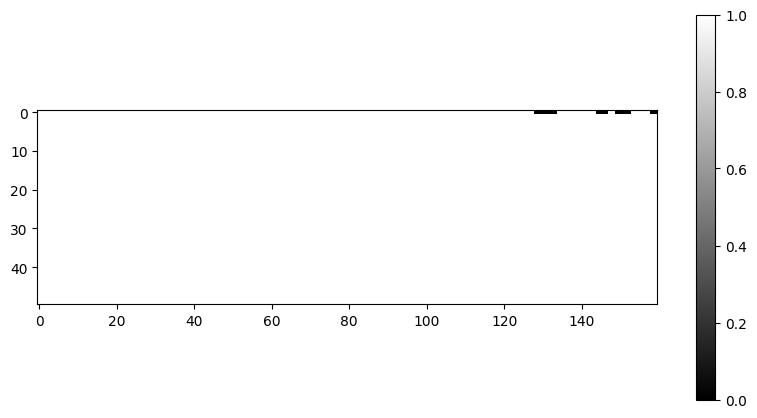

[codecarbon WARNING @ 07:10:25] Invalid gpu_ids format. Expected a string or a list of ints.
[codecarbon INFO @ 07:10:25] [setup] RAM Tracking...
[codecarbon INFO @ 07:10:25] [setup] GPU Tracking...
[codecarbon INFO @ 07:10:25] Tracking Nvidia GPU via pynvml
[codecarbon INFO @ 07:10:25] [setup] CPU Tracking...
[codecarbon WARNING @ 07:10:25] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 07:10:26] We saw that you have a Intel(R) Xeon(R) CPU @ 2.00GHz but we don't know it. Please contact us.
[codecarbon INFO @ 07:10:26] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.00GHz
[codecarbon INFO @ 07:10:26] >>> Tracker's metadata:
[codecarbon INFO @ 07:10:26]   Platform system: Linux-6.1.85+-x86_64-with-glibc2.35
[codecarbon INFO @ 07:10:26]   Python version: 3.10.12
[codecarbon INFO @ 07:10:26]   CodeCarbon version: 2.4.2
[codecarbon INFO @ 07:10:26]   Available RAM : 50.994 GB
[codecarbon INFO @ 07:10:26]   CPU count: 8
[codecarbon INFO

Epoch [1/50], Train Loss: 2.9088, Train Accuracy: 0.0932, Valid Loss: 2.8718, Valid Accuracy: 0.1016


Epoch 2/50:  17%|█▋        | 117/690 [00:02<00:14, 39.81batch/s][codecarbon INFO @ 07:10:47] Energy consumed for RAM : 0.018555 kWh. RAM Power : 19.1226167678833 W
[codecarbon INFO @ 07:10:47] Energy consumed for all GPUs : 0.027793 kWh. Total GPU Power : 32.66115229807702 W
[codecarbon INFO @ 07:10:47] Energy consumed for all CPUs : 0.041255 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 07:10:47] 0.087604 kWh of electricity used since the beginning.
Epoch 2/50:  75%|███████▍  | 516/690 [00:12<00:04, 42.34batch/s][codecarbon INFO @ 07:10:57] Energy consumed for all GPUs : 0.000270 kWh. Total GPU Power : 32.39313377883616 W
[codecarbon INFO @ 07:10:57] Energy consumed for all CPUs : 0.000354 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 07:10:57] 0.000784 kWh of electricity used since the beginning.
Validation 2/50: 100%|██████████| 173/173 [00:01<00:00, 160.16batch/s]


Epoch [2/50], Train Loss: 2.8801, Train Accuracy: 0.0964, Valid Loss: 2.8317, Valid Accuracy: 0.0997


Epoch 3/50:   0%|          | 0/690 [00:00<?, ?batch/s][codecarbon INFO @ 07:11:02] Energy consumed for RAM : 0.018635 kWh. RAM Power : 19.1226167678833 W
[codecarbon INFO @ 07:11:02] Energy consumed for all GPUs : 0.027928 kWh. Total GPU Power : 32.39460822602027 W
[codecarbon INFO @ 07:11:02] Energy consumed for all CPUs : 0.041432 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 07:11:02] 0.087995 kWh of electricity used since the beginning.
Epoch 3/50:  58%|█████▊    | 398/690 [00:09<00:07, 38.54batch/s][codecarbon INFO @ 07:11:11] Energy consumed for RAM : 0.000239 kWh. RAM Power : 19.1226167678833 W
[codecarbon INFO @ 07:11:11] Energy consumed for all GPUs : 0.000405 kWh. Total GPU Power : 32.42596495950576 W
[codecarbon INFO @ 07:11:12] Energy consumed for all CPUs : 0.000531 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 07:11:12] 0.001175 kWh of electricity used since the beginning.
Epoch 3/50:  89%|████████▉ | 617/690 [00:14<00:01, 42.26batch/s][codecarbon INFO @ 07:11:17] E

Epoch [3/50], Train Loss: 2.8680, Train Accuracy: 0.0960, Valid Loss: 2.8265, Valid Accuracy: 0.1000


Epoch 4/50:  42%|████▏     | 289/690 [00:06<00:09, 41.96batch/s][codecarbon INFO @ 07:11:26] Energy consumed for RAM : 0.000319 kWh. RAM Power : 19.1226167678833 W
[codecarbon INFO @ 07:11:27] Energy consumed for all GPUs : 0.000540 kWh. Total GPU Power : 32.45728912797847 W
[codecarbon INFO @ 07:11:27] Energy consumed for all CPUs : 0.000708 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 07:11:27] 0.001567 kWh of electricity used since the beginning.
Epoch 4/50:  74%|███████▍  | 514/690 [00:12<00:04, 42.01batch/s][codecarbon INFO @ 07:11:32] Energy consumed for RAM : 0.018794 kWh. RAM Power : 19.1226167678833 W
[codecarbon INFO @ 07:11:32] Energy consumed for all GPUs : 0.028198 kWh. Total GPU Power : 32.51903227131293 W
[codecarbon INFO @ 07:11:32] Energy consumed for all CPUs : 0.041786 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 07:11:32] 0.088779 kWh of electricity used since the beginning.
Validation 4/50: 100%|██████████| 173/173 [00:01<00:00, 160.46batch/s]


Epoch [4/50], Train Loss: 2.8505, Train Accuracy: 0.0973, Valid Loss: 2.7016, Valid Accuracy: 0.1134


Epoch 5/50:  26%|██▌       | 179/690 [00:04<00:12, 42.33batch/s][codecarbon INFO @ 07:11:41] Energy consumed for RAM : 0.000398 kWh. RAM Power : 19.1226167678833 W
[codecarbon INFO @ 07:11:42] Energy consumed for all GPUs : 0.000676 kWh. Total GPU Power : 32.71985114117884 W
[codecarbon INFO @ 07:11:42] Energy consumed for all CPUs : 0.000885 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 07:11:42] 0.001960 kWh of electricity used since the beginning.
Epoch 5/50:  59%|█████▉    | 409/690 [00:09<00:06, 42.27batch/s][codecarbon INFO @ 07:11:47] Energy consumed for RAM : 0.018874 kWh. RAM Power : 19.1226167678833 W
[codecarbon INFO @ 07:11:47] Energy consumed for all GPUs : 0.028334 kWh. Total GPU Power : 32.50890628749332 W
[codecarbon INFO @ 07:11:47] Energy consumed for all CPUs : 0.041963 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 07:11:47] 0.089171 kWh of electricity used since the beginning.
Validation 5/50: 100%|██████████| 173/173 [00:01<00:00, 163.32batch/s]


Epoch [5/50], Train Loss: 2.8278, Train Accuracy: 0.1030, Valid Loss: 2.6747, Valid Accuracy: 0.1185


Epoch 6/50:  11%|█▏        | 79/690 [00:01<00:14, 43.05batch/s][codecarbon INFO @ 07:11:56] Energy consumed for RAM : 0.000478 kWh. RAM Power : 19.1226167678833 W
[codecarbon INFO @ 07:11:57] Energy consumed for all GPUs : 0.000812 kWh. Total GPU Power : 32.58661490628864 W
[codecarbon INFO @ 07:11:57] Energy consumed for all CPUs : 0.001062 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 07:11:57] 0.002352 kWh of electricity used since the beginning.
Epoch 6/50:  44%|████▍     | 303/690 [00:07<00:09, 40.62batch/s][codecarbon INFO @ 07:12:02] Energy consumed for RAM : 0.018953 kWh. RAM Power : 19.1226167678833 W
[codecarbon INFO @ 07:12:02] Energy consumed for all GPUs : 0.028471 kWh. Total GPU Power : 32.81389103101043 W
[codecarbon INFO @ 07:12:02] Energy consumed for all CPUs : 0.042140 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 07:12:02] 0.089564 kWh of electricity used since the beginning.
Validation 6/50:  39%|███▊      | 67/173 [00:00<00:00, 163.89batch/s][codecarbon INFO

Epoch [6/50], Train Loss: 2.8185, Train Accuracy: 0.1050, Valid Loss: 2.7081, Valid Accuracy: 0.1241


Epoch 7/50:  28%|██▊       | 195/690 [00:04<00:12, 39.90batch/s][codecarbon INFO @ 07:12:17] Energy consumed for RAM : 0.019033 kWh. RAM Power : 19.1226167678833 W
[codecarbon INFO @ 07:12:17] Energy consumed for all GPUs : 0.028607 kWh. Total GPU Power : 32.72293415879873 W
[codecarbon INFO @ 07:12:17] Energy consumed for all CPUs : 0.042317 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 07:12:17] 0.089957 kWh of electricity used since the beginning.
Epoch 7/50:  87%|████████▋ | 602/690 [00:14<00:02, 41.19batch/s][codecarbon INFO @ 07:12:26] Energy consumed for RAM : 0.000637 kWh. RAM Power : 19.1226167678833 W
[codecarbon INFO @ 07:12:27] Energy consumed for all GPUs : 0.001084 kWh. Total GPU Power : 32.71811711231905 W
[codecarbon INFO @ 07:12:27] Energy consumed for all CPUs : 0.001416 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 07:12:27] 0.003138 kWh of electricity used since the beginning.
Validation 7/50: 100%|██████████| 173/173 [00:01<00:00, 166.05batch/s]


Epoch [7/50], Train Loss: 2.8245, Train Accuracy: 0.1041, Valid Loss: 2.6577, Valid Accuracy: 0.1178


Epoch 8/50:  14%|█▍        | 100/690 [00:02<00:13, 44.31batch/s][codecarbon INFO @ 07:12:32] Energy consumed for RAM : 0.019113 kWh. RAM Power : 19.1226167678833 W
[codecarbon INFO @ 07:12:32] Energy consumed for all GPUs : 0.028744 kWh. Total GPU Power : 32.86143053369872 W
[codecarbon INFO @ 07:12:32] Energy consumed for all CPUs : 0.042494 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 07:12:32] 0.090351 kWh of electricity used since the beginning.
Epoch 8/50:  74%|███████▍  | 510/690 [00:11<00:04, 43.67batch/s][codecarbon INFO @ 07:12:41] Energy consumed for RAM : 0.000717 kWh. RAM Power : 19.1226167678833 W
[codecarbon INFO @ 07:12:42] Energy consumed for all GPUs : 0.001222 kWh. Total GPU Power : 32.95780543562309 W
[codecarbon INFO @ 07:12:42] Energy consumed for all CPUs : 0.001594 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 07:12:42] 0.003532 kWh of electricity used since the beginning.
Validation 8/50: 100%|██████████| 173/173 [00:01<00:00, 163.10batch/s]


Epoch [8/50], Train Loss: 2.8147, Train Accuracy: 0.1060, Valid Loss: 2.6850, Valid Accuracy: 0.1315


Epoch 9/50:   1%|▏         | 9/690 [00:00<00:16, 42.37batch/s][codecarbon INFO @ 07:12:47] Energy consumed for RAM : 0.019192 kWh. RAM Power : 19.1226167678833 W
[codecarbon INFO @ 07:12:47] Energy consumed for all GPUs : 0.028881 kWh. Total GPU Power : 32.95117086379862 W
[codecarbon INFO @ 07:12:47] Energy consumed for all CPUs : 0.042671 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 07:12:47] 0.090745 kWh of electricity used since the beginning.
Epoch 9/50:  61%|██████▏   | 424/690 [00:09<00:06, 43.82batch/s][codecarbon INFO @ 07:12:56] Energy consumed for RAM : 0.000796 kWh. RAM Power : 19.1226167678833 W
[codecarbon INFO @ 07:12:57] Energy consumed for all GPUs : 0.001360 kWh. Total GPU Power : 33.24757676935183 W
[codecarbon INFO @ 07:12:57] Energy consumed for all CPUs : 0.001771 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 07:12:57] 0.003927 kWh of electricity used since the beginning.
Epoch 9/50:  95%|█████████▍| 654/690 [00:15<00:00, 40.90batch/s][codecarbon INFO @ 07:

Epoch [9/50], Train Loss: 2.8096, Train Accuracy: 0.1054, Valid Loss: 2.7432, Valid Accuracy: 0.1243


Epoch 10/50:  48%|████▊     | 329/690 [00:07<00:08, 43.44batch/s][codecarbon INFO @ 07:13:11] Energy consumed for RAM : 0.000876 kWh. RAM Power : 19.1226167678833 W
[codecarbon INFO @ 07:13:12] Energy consumed for all GPUs : 0.001498 kWh. Total GPU Power : 33.049305629159065 W
[codecarbon INFO @ 07:13:12] Energy consumed for all CPUs : 0.001948 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 07:13:12] 0.004321 kWh of electricity used since the beginning.
Epoch 10/50:  81%|████████  | 559/690 [00:13<00:03, 41.85batch/s][codecarbon INFO @ 07:13:17] Energy consumed for RAM : 0.019352 kWh. RAM Power : 19.1226167678833 W
[codecarbon INFO @ 07:13:17] Energy consumed for all GPUs : 0.029157 kWh. Total GPU Power : 33.290809048611735 W
[codecarbon INFO @ 07:13:17] Energy consumed for all CPUs : 0.043026 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 07:13:17] 0.091534 kWh of electricity used since the beginning.
Validation 10/50: 100%|██████████| 173/173 [00:01<00:00, 169.69batch/s]


Epoch [10/50], Train Loss: 2.8226, Train Accuracy: 0.1037, Valid Loss: 2.7213, Valid Accuracy: 0.1243


Epoch 11/50:  34%|███▍      | 235/690 [00:05<00:10, 43.07batch/s][codecarbon INFO @ 07:13:26] Energy consumed for RAM : 0.000956 kWh. RAM Power : 19.1226167678833 W
[codecarbon INFO @ 07:13:27] Energy consumed for all GPUs : 0.001635 kWh. Total GPU Power : 33.0467226132451 W
[codecarbon INFO @ 07:13:27] Energy consumed for all CPUs : 0.002125 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 07:13:27] 0.004716 kWh of electricity used since the beginning.
Epoch 11/50:  67%|██████▋   | 465/690 [00:10<00:05, 42.74batch/s][codecarbon INFO @ 07:13:32] Energy consumed for RAM : 0.019431 kWh. RAM Power : 19.1226167678833 W
[codecarbon INFO @ 07:13:32] Energy consumed for all GPUs : 0.029295 kWh. Total GPU Power : 33.04665838719351 W
[codecarbon INFO @ 07:13:32] Energy consumed for all CPUs : 0.043203 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 07:13:32] 0.091928 kWh of electricity used since the beginning.
Validation 11/50: 100%|██████████| 173/173 [00:01<00:00, 165.80batch/s]


Epoch [11/50], Train Loss: 2.8020, Train Accuracy: 0.1058, Valid Loss: 2.6750, Valid Accuracy: 0.1238


Epoch 12/50:  20%|██        | 140/690 [00:03<00:12, 43.64batch/s][codecarbon INFO @ 07:13:41] Energy consumed for RAM : 0.001035 kWh. RAM Power : 19.1226167678833 W
[codecarbon INFO @ 07:13:42] Energy consumed for all GPUs : 0.001773 kWh. Total GPU Power : 33.111728967827176 W
[codecarbon INFO @ 07:13:42] Energy consumed for all CPUs : 0.002302 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 07:13:42] 0.005110 kWh of electricity used since the beginning.
Epoch 12/50:  54%|█████▍    | 375/690 [00:08<00:07, 43.74batch/s][codecarbon INFO @ 07:13:47] Energy consumed for RAM : 0.019511 kWh. RAM Power : 19.1226167678833 W
[codecarbon INFO @ 07:13:47] Energy consumed for all GPUs : 0.029432 kWh. Total GPU Power : 33.11295596503219 W
[codecarbon INFO @ 07:13:47] Energy consumed for all CPUs : 0.043380 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 07:13:47] 0.092323 kWh of electricity used since the beginning.
Validation 12/50: 100%|██████████| 173/173 [00:01<00:00, 164.32batch/s]


Epoch [12/50], Train Loss: 2.8005, Train Accuracy: 0.1064, Valid Loss: 2.6709, Valid Accuracy: 0.1419


Epoch 13/50:   7%|▋         | 45/690 [00:01<00:15, 42.94batch/s][codecarbon INFO @ 07:13:57] Energy consumed for RAM : 0.001115 kWh. RAM Power : 19.1226167678833 W
[codecarbon INFO @ 07:13:57] Energy consumed for all GPUs : 0.001911 kWh. Total GPU Power : 33.052081188264644 W
[codecarbon INFO @ 07:13:57] Energy consumed for all CPUs : 0.002479 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 07:13:57] 0.005505 kWh of electricity used since the beginning.
Epoch 13/50:  41%|████      | 280/690 [00:06<00:09, 43.79batch/s][codecarbon INFO @ 07:14:02] Energy consumed for RAM : 0.019591 kWh. RAM Power : 19.1226167678833 W
[codecarbon INFO @ 07:14:02] Energy consumed for all GPUs : 0.029570 kWh. Total GPU Power : 33.02335564819251 W
[codecarbon INFO @ 07:14:02] Energy consumed for all CPUs : 0.043557 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 07:14:02] 0.092717 kWh of electricity used since the beginning.
Validation 13/50:   0%|          | 0/173 [00:00<?, ?batch/s][codecarbon INFO @ 07:

Epoch [13/50], Train Loss: 2.8090, Train Accuracy: 0.1063, Valid Loss: 2.6882, Valid Accuracy: 0.1248


Epoch 14/50:  27%|██▋       | 185/690 [00:04<00:12, 40.13batch/s][codecarbon INFO @ 07:14:17] Energy consumed for RAM : 0.019670 kWh. RAM Power : 19.1226167678833 W
[codecarbon INFO @ 07:14:17] Energy consumed for all GPUs : 0.029707 kWh. Total GPU Power : 32.995280278486725 W
[codecarbon INFO @ 07:14:17] Energy consumed for all CPUs : 0.043734 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 07:14:17] 0.093111 kWh of electricity used since the beginning.
Epoch 14/50:  86%|████████▌ | 595/690 [00:13<00:02, 43.18batch/s][codecarbon INFO @ 07:14:27] Energy consumed for RAM : 0.001274 kWh. RAM Power : 19.1226167678833 W
[codecarbon INFO @ 07:14:27] Energy consumed for all GPUs : 0.002186 kWh. Total GPU Power : 32.962070862343325 W
[codecarbon INFO @ 07:14:27] Energy consumed for all CPUs : 0.002833 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 07:14:27] 0.006293 kWh of electricity used since the beginning.
Validation 14/50: 100%|██████████| 173/173 [00:01<00:00, 160.73batch/s]


Epoch [14/50], Train Loss: 2.7962, Train Accuracy: 0.1085, Valid Loss: 2.6391, Valid Accuracy: 0.1308


Epoch 15/50:  12%|█▏        | 85/690 [00:02<00:14, 41.53batch/s][codecarbon INFO @ 07:14:32] Energy consumed for RAM : 0.019750 kWh. RAM Power : 19.1226167678833 W
[codecarbon INFO @ 07:14:32] Energy consumed for all GPUs : 0.029845 kWh. Total GPU Power : 33.11516518445511 W
[codecarbon INFO @ 07:14:32] Energy consumed for all CPUs : 0.043911 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 07:14:32] 0.093506 kWh of electricity used since the beginning.
Epoch 15/50:  71%|███████   | 490/690 [00:11<00:04, 41.17batch/s][codecarbon INFO @ 07:14:42] Energy consumed for RAM : 0.001354 kWh. RAM Power : 19.1226167678833 W
[codecarbon INFO @ 07:14:42] Energy consumed for all GPUs : 0.002323 kWh. Total GPU Power : 32.87713238304006 W
[codecarbon INFO @ 07:14:42] Energy consumed for all CPUs : 0.003010 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 07:14:42] 0.006687 kWh of electricity used since the beginning.
Validation 15/50:  80%|███████▉  | 138/173 [00:00<00:00, 167.28batch/s][codecarbon 

Epoch [15/50], Train Loss: 2.8053, Train Accuracy: 0.1067, Valid Loss: 2.7330, Valid Accuracy: 0.1187


Epoch 16/50:  57%|█████▋    | 395/690 [00:09<00:07, 42.10batch/s][codecarbon INFO @ 07:14:57] Energy consumed for RAM : 0.001433 kWh. RAM Power : 19.1226167678833 W
[codecarbon INFO @ 07:14:57] Energy consumed for all GPUs : 0.002461 kWh. Total GPU Power : 32.978149714564296 W
[codecarbon INFO @ 07:14:57] Energy consumed for all CPUs : 0.003187 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 07:14:57] 0.007081 kWh of electricity used since the beginning.
Epoch 16/50:  91%|█████████ | 625/690 [00:14<00:01, 43.15batch/s][codecarbon INFO @ 07:15:02] Energy consumed for RAM : 0.019909 kWh. RAM Power : 19.1226167678833 W
[codecarbon INFO @ 07:15:02] Energy consumed for all GPUs : 0.030120 kWh. Total GPU Power : 32.9117388685767 W
[codecarbon INFO @ 07:15:02] Energy consumed for all CPUs : 0.044265 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 07:15:02] 0.094294 kWh of electricity used since the beginning.
Validation 16/50: 100%|██████████| 173/173 [00:01<00:00, 163.56batch/s]


Epoch [16/50], Train Loss: 2.8030, Train Accuracy: 0.1040, Valid Loss: 2.6157, Valid Accuracy: 0.1392


Epoch 17/50:  43%|████▎     | 298/690 [00:07<00:09, 43.14batch/s][codecarbon INFO @ 07:15:12] Energy consumed for all GPUs : 0.002598 kWh. Total GPU Power : 33.06063717866203 W
[codecarbon INFO @ 07:15:12] Energy consumed for all CPUs : 0.003364 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 07:15:12] 0.007475 kWh of electricity used since the beginning.
Epoch 17/50:  76%|███████▌  | 523/690 [00:12<00:03, 42.21batch/s][codecarbon INFO @ 07:15:17] Energy consumed for RAM : 0.019989 kWh. RAM Power : 19.1226167678833 W
[codecarbon INFO @ 07:15:17] Energy consumed for all GPUs : 0.030257 kWh. Total GPU Power : 33.077738935108314 W
[codecarbon INFO @ 07:15:17] Energy consumed for all CPUs : 0.044442 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 07:15:17] 0.094688 kWh of electricity used since the beginning.
Validation 17/50: 100%|██████████| 173/173 [00:01<00:00, 164.24batch/s]


Epoch [17/50], Train Loss: 2.7936, Train Accuracy: 0.1051, Valid Loss: 2.6266, Valid Accuracy: 0.1410


Epoch 18/50:  28%|██▊       | 195/690 [00:04<00:11, 42.64batch/s][codecarbon INFO @ 07:15:27] Energy consumed for RAM : 0.001593 kWh. RAM Power : 19.1226167678833 W
[codecarbon INFO @ 07:15:27] Energy consumed for all GPUs : 0.002736 kWh. Total GPU Power : 33.1452185272591 W
[codecarbon INFO @ 07:15:27] Energy consumed for all CPUs : 0.003541 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 07:15:27] 0.007870 kWh of electricity used since the beginning.
Epoch 18/50:  61%|██████    | 420/690 [00:09<00:06, 42.49batch/s][codecarbon INFO @ 07:15:32] Energy consumed for RAM : 0.020068 kWh. RAM Power : 19.1226167678833 W
[codecarbon INFO @ 07:15:32] Energy consumed for all GPUs : 0.030395 kWh. Total GPU Power : 33.10476918330122 W
[codecarbon INFO @ 07:15:32] Energy consumed for all CPUs : 0.044619 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 07:15:32] 0.095083 kWh of electricity used since the beginning.
Validation 18/50: 100%|██████████| 173/173 [00:01<00:00, 160.93batch/s]


Epoch [18/50], Train Loss: 2.8012, Train Accuracy: 0.1076, Valid Loss: 2.6544, Valid Accuracy: 0.1308


Epoch 19/50:  13%|█▎        | 90/690 [00:02<00:14, 40.89batch/s][codecarbon INFO @ 07:15:42] Energy consumed for RAM : 0.001672 kWh. RAM Power : 19.1226167678833 W
[codecarbon INFO @ 07:15:42] Energy consumed for all GPUs : 0.002875 kWh. Total GPU Power : 33.25865356748616 W
[codecarbon INFO @ 07:15:42] Energy consumed for all CPUs : 0.003718 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 07:15:42] 0.008265 kWh of electricity used since the beginning.
Epoch 19/50:  45%|████▍     | 310/690 [00:07<00:09, 40.59batch/s][codecarbon INFO @ 07:15:47] Energy consumed for RAM : 0.020148 kWh. RAM Power : 19.1226167678833 W
[codecarbon INFO @ 07:15:47] Energy consumed for all GPUs : 0.030533 kWh. Total GPU Power : 33.023655504531455 W
[codecarbon INFO @ 07:15:47] Energy consumed for all CPUs : 0.044796 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 07:15:47] 0.095477 kWh of electricity used since the beginning.
Validation 19/50:  59%|█████▉    | 102/173 [00:00<00:00, 164.75batch/s][codecarbon

Epoch [19/50], Train Loss: 2.7986, Train Accuracy: 0.1055, Valid Loss: 2.6511, Valid Accuracy: 0.1241


Epoch 20/50:  30%|███       | 210/690 [00:04<00:11, 42.95batch/s][codecarbon INFO @ 07:16:02] Energy consumed for RAM : 0.020228 kWh. RAM Power : 19.1226167678833 W
[codecarbon INFO @ 07:16:02] Energy consumed for all GPUs : 0.030671 kWh. Total GPU Power : 33.184960081498026 W
[codecarbon INFO @ 07:16:02] Energy consumed for all CPUs : 0.044973 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 07:16:02] 0.095872 kWh of electricity used since the beginning.
Epoch 20/50:  90%|████████▉ | 620/690 [00:14<00:01, 43.05batch/s][codecarbon INFO @ 07:16:12] Energy consumed for RAM : 0.001832 kWh. RAM Power : 19.1226167678833 W
[codecarbon INFO @ 07:16:12] Energy consumed for all GPUs : 0.003149 kWh. Total GPU Power : 32.90739702459559 W
[codecarbon INFO @ 07:16:12] Energy consumed for all CPUs : 0.004072 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 07:16:12] 0.009053 kWh of electricity used since the beginning.
Validation 20/50: 100%|██████████| 173/173 [00:01<00:00, 169.77batch/s]


Epoch [20/50], Train Loss: 2.7987, Train Accuracy: 0.1098, Valid Loss: 2.6601, Valid Accuracy: 0.1290


Epoch 21/50:  17%|█▋        | 120/690 [00:02<00:13, 43.77batch/s][codecarbon INFO @ 07:16:17] Energy consumed for RAM : 0.020307 kWh. RAM Power : 19.1226167678833 W
[codecarbon INFO @ 07:16:17] Energy consumed for all GPUs : 0.030808 kWh. Total GPU Power : 32.96508678077541 W
[codecarbon INFO @ 07:16:17] Energy consumed for all CPUs : 0.045150 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 07:16:17] 0.096266 kWh of electricity used since the beginning.
Epoch 21/50:  76%|███████▌  | 524/690 [00:12<00:03, 43.78batch/s][codecarbon INFO @ 07:16:27] Energy consumed for RAM : 0.001911 kWh. RAM Power : 19.1226167678833 W
[codecarbon INFO @ 07:16:27] Energy consumed for all GPUs : 0.003286 kWh. Total GPU Power : 32.96511409482903 W
[codecarbon INFO @ 07:16:27] Energy consumed for all CPUs : 0.004249 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 07:16:27] 0.009447 kWh of electricity used since the beginning.
Validation 21/50: 100%|██████████| 173/173 [00:01<00:00, 165.53batch/s]


Epoch [21/50], Train Loss: 2.8001, Train Accuracy: 0.1088, Valid Loss: 2.6597, Valid Accuracy: 0.1296


Epoch 22/50:   3%|▎         | 20/690 [00:00<00:16, 41.42batch/s][codecarbon INFO @ 07:16:32] Energy consumed for RAM : 0.020387 kWh. RAM Power : 19.1226167678833 W
[codecarbon INFO @ 07:16:32] Energy consumed for all GPUs : 0.030946 kWh. Total GPU Power : 32.961431796482266 W
[codecarbon INFO @ 07:16:32] Energy consumed for all CPUs : 0.045327 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 07:16:32] 0.096660 kWh of electricity used since the beginning.
Epoch 22/50:  62%|██████▏   | 430/690 [00:10<00:05, 43.75batch/s][codecarbon INFO @ 07:16:42] Energy consumed for RAM : 0.001991 kWh. RAM Power : 19.1226167678833 W
[codecarbon INFO @ 07:16:42] Energy consumed for all GPUs : 0.003424 kWh. Total GPU Power : 33.04452239889127 W
[codecarbon INFO @ 07:16:42] Energy consumed for all CPUs : 0.004426 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 07:16:42] 0.009841 kWh of electricity used since the beginning.
Epoch 22/50:  96%|█████████▋| 665/690 [00:15<00:00, 43.70batch/s][codecarbon INFO 

Epoch [22/50], Train Loss: 2.7851, Train Accuracy: 0.1120, Valid Loss: 2.6273, Valid Accuracy: 0.1395


Epoch 23/50:  50%|█████     | 345/690 [00:07<00:08, 42.23batch/s][codecarbon INFO @ 07:16:57] Energy consumed for RAM : 0.002070 kWh. RAM Power : 19.1226167678833 W
[codecarbon INFO @ 07:16:57] Energy consumed for all GPUs : 0.003563 kWh. Total GPU Power : 33.37325190058282 W
[codecarbon INFO @ 07:16:57] Energy consumed for all CPUs : 0.004603 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 07:16:57] 0.010237 kWh of electricity used since the beginning.
Epoch 23/50:  85%|████████▍ | 585/690 [00:13<00:02, 44.10batch/s][codecarbon INFO @ 07:17:02] Energy consumed for RAM : 0.020546 kWh. RAM Power : 19.1226167678833 W
[codecarbon INFO @ 07:17:02] Energy consumed for all GPUs : 0.031221 kWh. Total GPU Power : 33.2116112539633 W
[codecarbon INFO @ 07:17:02] Energy consumed for all CPUs : 0.045681 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 07:17:02] 0.097449 kWh of electricity used since the beginning.
Validation 23/50: 100%|██████████| 173/173 [00:01<00:00, 167.26batch/s]


Epoch [23/50], Train Loss: 2.7910, Train Accuracy: 0.1071, Valid Loss: 2.6350, Valid Accuracy: 0.1395


Epoch 24/50:  39%|███▉      | 269/690 [00:06<00:09, 44.45batch/s][codecarbon INFO @ 07:17:12] Energy consumed for RAM : 0.002150 kWh. RAM Power : 19.1226167678833 W
[codecarbon INFO @ 07:17:12] Energy consumed for all GPUs : 0.003701 kWh. Total GPU Power : 33.240771709869875 W
[codecarbon INFO @ 07:17:12] Energy consumed for all CPUs : 0.004781 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 07:17:12] 0.010632 kWh of electricity used since the beginning.
Epoch 24/50:  73%|███████▎  | 504/690 [00:11<00:04, 44.64batch/s][codecarbon INFO @ 07:17:17] Energy consumed for RAM : 0.020626 kWh. RAM Power : 19.1226167678833 W
[codecarbon INFO @ 07:17:17] Energy consumed for all GPUs : 0.031361 kWh. Total GPU Power : 33.44785644661484 W
[codecarbon INFO @ 07:17:17] Energy consumed for all CPUs : 0.045858 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 07:17:17] 0.097845 kWh of electricity used since the beginning.
Validation 24/50: 100%|██████████| 173/173 [00:01<00:00, 168.46batch/s]


Epoch [24/50], Train Loss: 2.7851, Train Accuracy: 0.1076, Valid Loss: 2.6929, Valid Accuracy: 0.1096


Epoch 25/50:  28%|██▊       | 190/690 [00:04<00:11, 44.52batch/s][codecarbon INFO @ 07:17:27] Energy consumed for RAM : 0.002230 kWh. RAM Power : 19.1226167678833 W
[codecarbon INFO @ 07:17:27] Energy consumed for all GPUs : 0.003840 kWh. Total GPU Power : 33.299439986540676 W
[codecarbon INFO @ 07:17:27] Energy consumed for all CPUs : 0.004958 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 07:17:27] 0.011027 kWh of electricity used since the beginning.
Epoch 25/50:  62%|██████▏   | 425/690 [00:09<00:06, 43.25batch/s][codecarbon INFO @ 07:17:32] Energy consumed for RAM : 0.020705 kWh. RAM Power : 19.1226167678833 W
[codecarbon INFO @ 07:17:32] Energy consumed for all GPUs : 0.031500 kWh. Total GPU Power : 33.35153659469599 W
[codecarbon INFO @ 07:17:32] Energy consumed for all CPUs : 0.046035 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 07:17:32] 0.098240 kWh of electricity used since the beginning.
Validation 25/50: 100%|██████████| 173/173 [00:01<00:00, 166.03batch/s]


Epoch [25/50], Train Loss: 2.7930, Train Accuracy: 0.1069, Valid Loss: 2.6509, Valid Accuracy: 0.1350


Epoch 26/50:  17%|█▋        | 115/690 [00:02<00:13, 43.90batch/s][codecarbon INFO @ 07:17:42] Energy consumed for RAM : 0.002309 kWh. RAM Power : 19.1226167678833 W
[codecarbon INFO @ 07:17:42] Energy consumed for all GPUs : 0.003979 kWh. Total GPU Power : 33.41201243724607 W
[codecarbon INFO @ 07:17:42] Energy consumed for all CPUs : 0.005135 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 07:17:42] 0.011423 kWh of electricity used since the beginning.
Epoch 26/50:  51%|█████     | 350/690 [00:08<00:07, 44.22batch/s][codecarbon INFO @ 07:17:47] Energy consumed for RAM : 0.020785 kWh. RAM Power : 19.1226167678833 W
[codecarbon INFO @ 07:17:47] Energy consumed for all GPUs : 0.031639 kWh. Total GPU Power : 33.44871477605412 W
[codecarbon INFO @ 07:17:47] Energy consumed for all CPUs : 0.046212 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 07:17:47] 0.098636 kWh of electricity used since the beginning.
Validation 26/50: 100%|██████████| 173/173 [00:01<00:00, 166.31batch/s]
[codecarbo

Epoch [26/50], Train Loss: 2.8049, Train Accuracy: 0.1096, Valid Loss: 2.6923, Valid Accuracy: 0.1366
Early stopping en la época 26
Mejor pérdida de validación: 2.6157


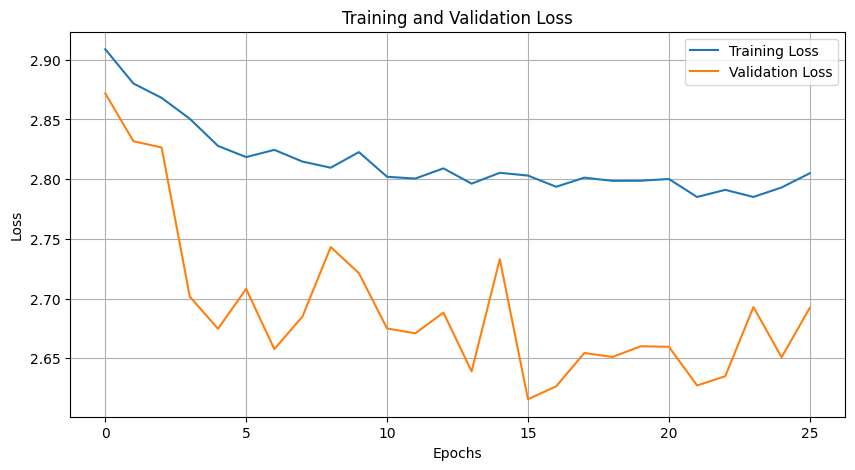

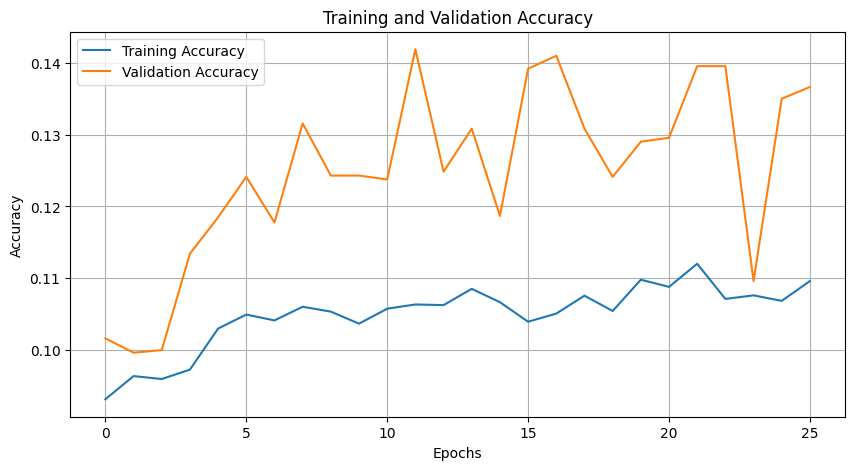

In [10]:
# Habilitar la detección de anomalías
torch.autograd.set_detect_anomaly(True)

# Sección de Hiperparámetros
class Config:
    batch_size = 32
    learning_rate = 0.001
    num_epochs = 50
    beta = 0.9  # Parámetro de decaimiento para las capas LIF
    patience = 10  # Parámetro de paciencia para EarlyStopping
    min_delta = 0.001  # Parámetro de cambio mínimo para EarlyStopping

# Definir EarlyStopping
class EarlyStopping:
    def __init__(self, patience=Config.patience, min_delta=Config.min_delta):
        self.patience = patience
        self.min_delta = min_delta
        self.counter = 0
        self.best_loss = None
        self.early_stop = False

    def __call__(self, val_loss):
        if self.best_loss is None:
            self.best_loss = val_loss
        elif val_loss < self.best_loss - self.min_delta:
            self.best_loss = val_loss
            self.counter = 0
        elif val_loss >= self.best_loss - self.min_delta:
            self.counter += 1
            if self.counter >= self.patience:
                self.early_stop = True

# Función para cargar datos desde HDF5
def load_hdf5(file_name):
    with h5py.File(file_name, 'r') as f:
        delta_images = torch.tensor(f['delta_images'][:])
        angles = torch.tensor(f['angles'][:])
    return delta_images, angles

# Función para guardar datos en HDF5
def save_to_hdf5(delta_images, angles, file_name):
    with h5py.File(file_name, 'w') as f:
        f.create_dataset('delta_images', data=delta_images.cpu().numpy(), compression="gzip")
        f.create_dataset('angles', data=angles.cpu().numpy(), compression="gzip")

current_time = datetime.now().strftime('%Y%m%d_%H%M%S')

# Cargar datos de entrenamiento y validación desde HDF5
training_delta_images, training_angles = load_hdf5('/content/drive/MyDrive/UOC/TFM/Spike Encoding/Version_10/training_data_pairs_20240618_053500.hdf5')
validation_delta_images, validation_angles = load_hdf5('/content/drive/MyDrive/UOC/TFM/Spike Encoding/Version_10/validation_data_pairs_20240618_053500.hdf5')

# Añadir una dimensión de canal a las imágenes
training_delta_images = training_delta_images.unsqueeze(1)  # Añadir canal de entrada
validation_delta_images = validation_delta_images.unsqueeze(1)  # Añadir canal de entrada

# Guardar los datos ajustados en nuevos archivos HDF5
save_to_hdf5(training_delta_images, training_angles, 'adjusted_training_data.hdf5')
save_to_hdf5(validation_delta_images, validation_angles, 'adjusted_validation_data.hdf5')

print(f"Total de pares de datos codificados y ajustados en entrenamiento: {training_delta_images.shape[0]}")
print(f"Total de pares de datos codificados y ajustados en validación: {validation_delta_images.shape[0]}")

# Mostrar la primera posición de training_delta_images y training_angles
print("Primera imagen codificada en impulsos (training_delta_images[0]):", training_delta_images[0])
print("Ángulo asociado (training_angles[0]):", training_angles[0])
# Imprimir en un plot training_delta_images[0]
first_image = training_delta_images[0].squeeze(0)  # Eliminar la dimensión del canal para la visualización

plt.figure(figsize=(10, 5))
plt.imshow(first_image, cmap='gray')
plt.colorbar()
plt.show()

# Definir la arquitectura CSNN basada en PilotNet con 21 salidas
class CSNNPilotNet(nn.Module):
    def __init__(self):
        super(CSNNPilotNet, self).__init__()
        self.conv1 = nn.Conv2d(1, 24, kernel_size=5, stride=2)
        self.conv2 = nn.Conv2d(24, 36, kernel_size=5, stride=2)
        self.conv3 = nn.Conv2d(36, 48, kernel_size=5, stride=2)
        self.conv4 = nn.Conv2d(48, 64, kernel_size=3)

        self.lif1 = snn.Leaky(beta=Config.beta, spike_grad=surrogate.fast_sigmoid())
        self.lif2 = snn.Leaky(beta=Config.beta, spike_grad=surrogate.fast_sigmoid())
        self.lif3 = snn.Leaky(beta=Config.beta, spike_grad=surrogate.fast_sigmoid())
        self.lif4 = snn.Leaky(beta=Config.beta, spike_grad=surrogate.fast_sigmoid())

        self.fc1 = nn.Linear(self._get_conv_output((1, 1, 50, 160)), 100)
        self.fc2 = nn.Linear(100, 50)
        self.fc3 = nn.Linear(50, 10)
        self.fc4 = nn.Linear(10, 21)

    def _get_conv_output(self, shape):
        with torch.no_grad():
            input = torch.randn(*shape)
            output = self.conv1(input)
            output, _ = self.lif1(output, self.lif1.init_leaky())
            output = self.conv2(output)
            output, _ = self.lif2(output, self.lif2.init_leaky())
            output = self.conv3(output)
            output, _ = self.lif3(output, self.lif3.init_leaky())
            output = self.conv4(output)
            output, _ = self.lif4(output, self.lif4.init_leaky())
            output = output.view(output.size(0), -1)
            n_size = output.size(1)
        return n_size

    def forward(self, x, mem1, mem2, mem3, mem4):
        x = self.conv1(x)
        x, mem1 = self.lif1(x, mem1)
        x = self.conv2(x)
        x, mem2 = self.lif2(x, mem2)
        x = self.conv3(x)
        x, mem3 = self.lif3(x, mem3)
        x = self.conv4(x)
        x, mem4 = self.lif4(x, mem4)

        x = x.view(x.size(0), -1)
        x = self.fc1(x)
        x = self.fc2(x)
        x = self.fc3(x)
        x = self.fc4(x)
        return x, mem1, mem2, mem3, mem4

# Función para guardar la salida en un archivo
def save_epoch_output(epoch, train_loss, train_accuracy, valid_loss, valid_accuracy):
    with open('/content/drive/MyDrive/UOC/TFM/Spike Encoding/training_output.txt', 'a') as f:
        f.write(f"Epoch [{epoch+1}], Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.4f}, Valid Loss: {valid_loss:.4f}, Valid Accuracy: {valid_accuracy:.4f}\n")

# Inicializar el modelo
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model = CSNNPilotNet().to(device)

# Inicializar las capas ocultas de la red
def init_weights(m):
    if isinstance(m, nn.Conv2d) or isinstance(m, nn.Linear):
        nn.init.kaiming_normal_(m.weight)
        if m.bias is not None:
            nn.init.constant_(m.bias, 0)

model.apply(init_weights)

# Crear DataLoaders para entrenamiento y validación
train_dataset = TensorDataset(training_delta_images, training_angles)
valid_dataset = TensorDataset(validation_delta_images, validation_angles)

train_loader = DataLoader(train_dataset, batch_size=Config.batch_size, shuffle=True)
valid_loader = DataLoader(valid_dataset, batch_size=Config.batch_size, shuffle=False)

# Definir el optimizador y la función de pérdida
optimizer = optim.Adam(model.parameters(), lr=Config.learning_rate)
criterion = nn.CrossEntropyLoss()

# Inicializar EarlyStopping
early_stopping = EarlyStopping(patience=Config.patience, min_delta=Config.min_delta)

# Iniciar el tracker de CodeCarbon
tracker = EmissionsTracker(output_dir='/content/drive/MyDrive/UOC/TFM/EcoEfficiency_Reports/', project_name=f"emissions_train_{current_time}.csv")
tracker.start()

# Configuración de TensorBoard
log_dir = f"runs/CSNN_PilotNet_{datetime.now().strftime('%Y%m%d-%H%M%S')}"
writer = SummaryWriter(log_dir)

# Función para calcular la precisión
def calculate_accuracy(output, target):
    _, predicted = torch.max(output, 1)
    correct = (predicted == target).sum().item()
    return correct / len(target)

# Ciclo de entrenamiento
train_losses = []
valid_losses = []
train_accuracies = []
valid_accuracies = []

best_valid_loss = float('inf')
best_model_wts = None

for epoch in range(Config.num_epochs):
    model.train()
    train_loss = 0.0
    train_correct = 0
    total_train = 0

    with tqdm(total=len(train_loader), desc=f"Epoch {epoch+1}/{Config.num_epochs}", unit="batch") as pbar:
        for i, (delta_images, angles) in enumerate(train_loader):
            if isinstance(delta_images, tuple):
                delta_images = delta_images[0]
            if isinstance(angles, tuple):
                angles = angles[0]

            delta_images, angles = delta_images.to(device), angles.to(device)

            optimizer.zero_grad()

            mem1 = model.lif1.init_leaky()
            mem2 = model.lif2.init_leaky()
            mem3 = model.lif3.init_leaky()
            mem4 = model.lif4.init_leaky()

            outputs, mem1, mem2, mem3, mem4 = model(delta_images, mem1, mem2, mem3, mem4)

            angles = angles.argmax(dim=1).long()  # Convertir ángulos a clases

            loss = criterion(outputs, angles)
            loss.backward()
            optimizer.step()
            train_loss += loss.item()

            train_correct += calculate_accuracy(outputs, angles) * len(delta_images)
            total_train += len(delta_images)

            pbar.update(1)

    train_losses.append(train_loss / len(train_loader))
    train_accuracies.append(train_correct / total_train)

    model.eval()
    valid_loss = 0.0
    valid_correct = 0
    total_valid = 0

    with torch.no_grad():
        with tqdm(total=len(valid_loader), desc=f"Validation {epoch+1}/{Config.num_epochs}", unit="batch") as pbar:
            for delta_images, angles in valid_loader:
                if isinstance(delta_images, tuple):
                    delta_images = delta_images[0]
                if isinstance(angles, tuple):
                    angles = angles[0]

                delta_images, angles = delta_images.to(device), angles.to(device)

                angles = angles.argmax(dim=1).long()  # Convertir ángulos a clases

                mem1 = model.lif1.init_leaky()
                mem2 = model.lif2.init_leaky()
                mem3 = model.lif3.init_leaky()
                mem4 = model.lif4.init_leaky()

                outputs, mem1, mem2, mem3, mem4 = model(delta_images, mem1, mem2, mem3, mem4)
                loss = criterion(outputs, angles)
                valid_loss += loss.item()

                valid_correct += calculate_accuracy(outputs, angles) * len(delta_images)
                total_valid += len(delta_images)

                pbar.update(1)

    valid_losses.append(valid_loss / len(valid_loader))
    valid_accuracies.append(valid_correct / total_valid)

    print(f"Epoch [{epoch+1}/{Config.num_epochs}], Train Loss: {train_loss/len(train_loader):.4f}, Train Accuracy: {train_correct/total_train:.4f}, Valid Loss: {valid_loss/len(valid_loader):.4f}, Valid Accuracy: {valid_correct/total_valid:.4f}")

    # Guardar la salida de la época en un archivo
    save_epoch_output(epoch, train_loss/len(train_loader), train_correct/total_train, valid_loss/len(valid_loader), valid_correct/total_valid)

    # Escribir en TensorBoard
    writer.add_scalar('Loss/Train', train_loss/len(train_loader), epoch)
    writer.add_scalar('Loss/Valid', valid_loss/len(valid_loader), epoch)
    writer.add_scalar('Accuracy/Train', train_correct/total_train, epoch)
    writer.add_scalar('Accuracy/Valid', valid_correct/total_valid, epoch)

    if valid_loss / len(valid_loader) < best_valid_loss:
        best_valid_loss = valid_loss / len(valid_loader)
        best_model_wts = model.state_dict()

    early_stopping(valid_loss / len(valid_loader))
    if early_stopping.early_stop:
        print(f"Early stopping en la época {epoch+1}")
        break

model.load_state_dict(best_model_wts)
torch.save(model.state_dict(), f'/content/drive/MyDrive/UOC/TFM/Models/Version_12/best_model_{current_time}.pth')

tracker.stop()

print(f"Mejor pérdida de validación: {best_valid_loss:.4f}")

plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Training Loss')
plt.plot(valid_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(train_accuracies, label='Training Accuracy')
plt.plot(valid_accuracies, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Cerrar el escritor de TensorBoard
writer.close()
